In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('V-Dem.csv')

In [2]:
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Denmark', 'Czechia', 
    'Finland', 'France', 'Germany', 'Greece', 'Hungary',  'Estonia', 'Ireland', 'Iceland', 'Israel',
    'Italy', 'Japan', 'South Korea','Lithuania','Luxembourg', 'Netherlands', 'Mexico', 
    'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Türkiye', 'United Kingdom', 'Costa Rica','Bulgaria', 'Croatia', 'Cyprus',
    'Malta', 'Romania', 'Qatar', 'Singapore', 'United Arab Emirates', 'Taiwan', 'Saudi Arabia', 'Brazil',
    'South Africa', 'Pakistan', 'Malaysia', 'Algeria', 'Armenia', 'Azerbaijan', 'Mongolia', 'Morocco', 'Peru',
    'Belarus', 'Serbia'
]

oecd_data = data[data['country_name'].isin(oecd_countries)]
oecd_data.head()

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN


# Data Set

In [3]:
new_data = oecd_data[['country_name', 'year', 'e_gdp', 'e_pop', 'v2x_polyarchy']]
new_data = pd.DataFrame(new_data)
new_data = new_data[(new_data['year'] >= 1991) & (new_data['year'] <= 2022)]
new_data.rename(columns={'country_name': 'country', 'e_gdp': 'gdp', 'e_pop': 'population',
                         'v2x_polyarchy': 'political stability'}, inplace=True)
new_data.head()

,country,year,gdp,population,political stability
202,Mexico,1991,107374.498,9231.606,0.415
203,Mexico,1992,111533.160,9387.637,0.441
204,Mexico,1993,114611.243,9566.864,0.455
205,Mexico,1994,117157.052,9731.607,0.474
206,Mexico,1995,115510.527,9839.173,0.493


In [4]:
new_data = new_data.sort_values(by=['country', 'year'])
new_data.head()

,country,year,gdp,population,political stability
15888,Algeria,1991,23530.312,2837.938,0.354
15889,Algeria,1992,23726.588,2914.751,0.190
15890,Algeria,1993,23303.524,2965.315,0.174
15891,Algeria,1994,23255.804,3011.016,0.184
15892,Algeria,1995,23995.171,3073.066,0.191


# Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = new_data
df.head()

# https://habr.com/ru/companies/skillfactory/articles/700260/

,country,year,gdp,population,political stability
15888,Algeria,1991,23530.312,2837.938,0.354
15889,Algeria,1992,23726.588,2914.751,0.190
15890,Algeria,1993,23303.524,2965.315,0.174
15891,Algeria,1994,23255.804,3011.016,0.184
15892,Algeria,1995,23995.171,3073.066,0.191


In [6]:
df.country.values

array(['Algeria', 'Algeria', 'Algeria', ..., 'United Kingdom',
       'United Kingdom', 'United Kingdom'], dtype=object)

In [7]:
df = df[~df['year'].between(2021, 2023)]

In [8]:
treatment_year = 2010
treated_country = 'Hungary'

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style='darkgrid', palette='deep')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['savefig.format'] = 'png'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
df['gdp'] = np.log(df['gdp'])

In [11]:
df.head()

,country,year,gdp,population,political stability
15888,Algeria,1991,10.066045,2837.938,0.354
15889,Algeria,1992,10.074352,2914.751,0.190
15890,Algeria,1993,10.056360,2965.315,0.174
15891,Algeria,1994,10.054310,3011.016,0.184
15892,Algeria,1995,10.085608,3073.066,0.191


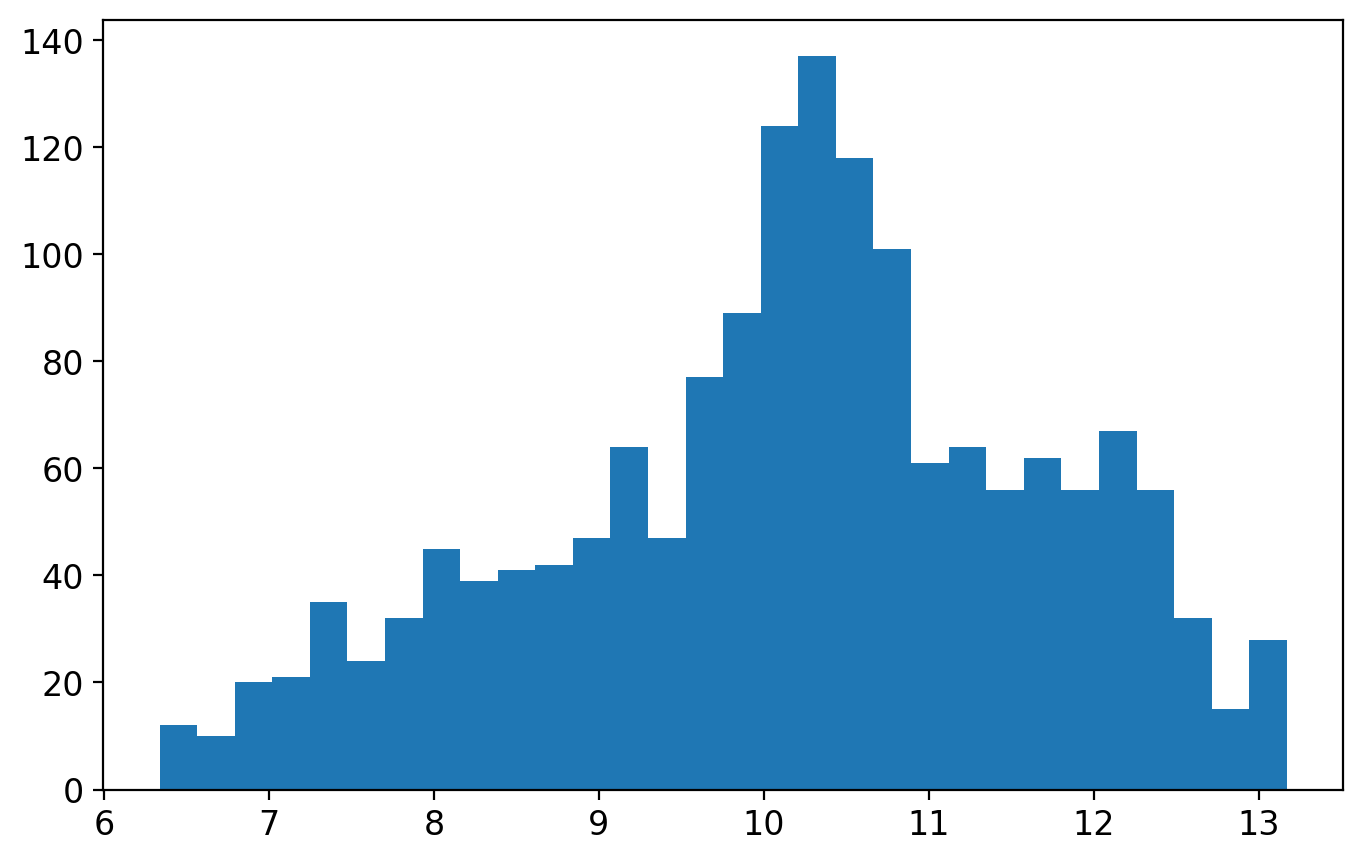

In [12]:
plt.hist(df['gdp'], bins=30);

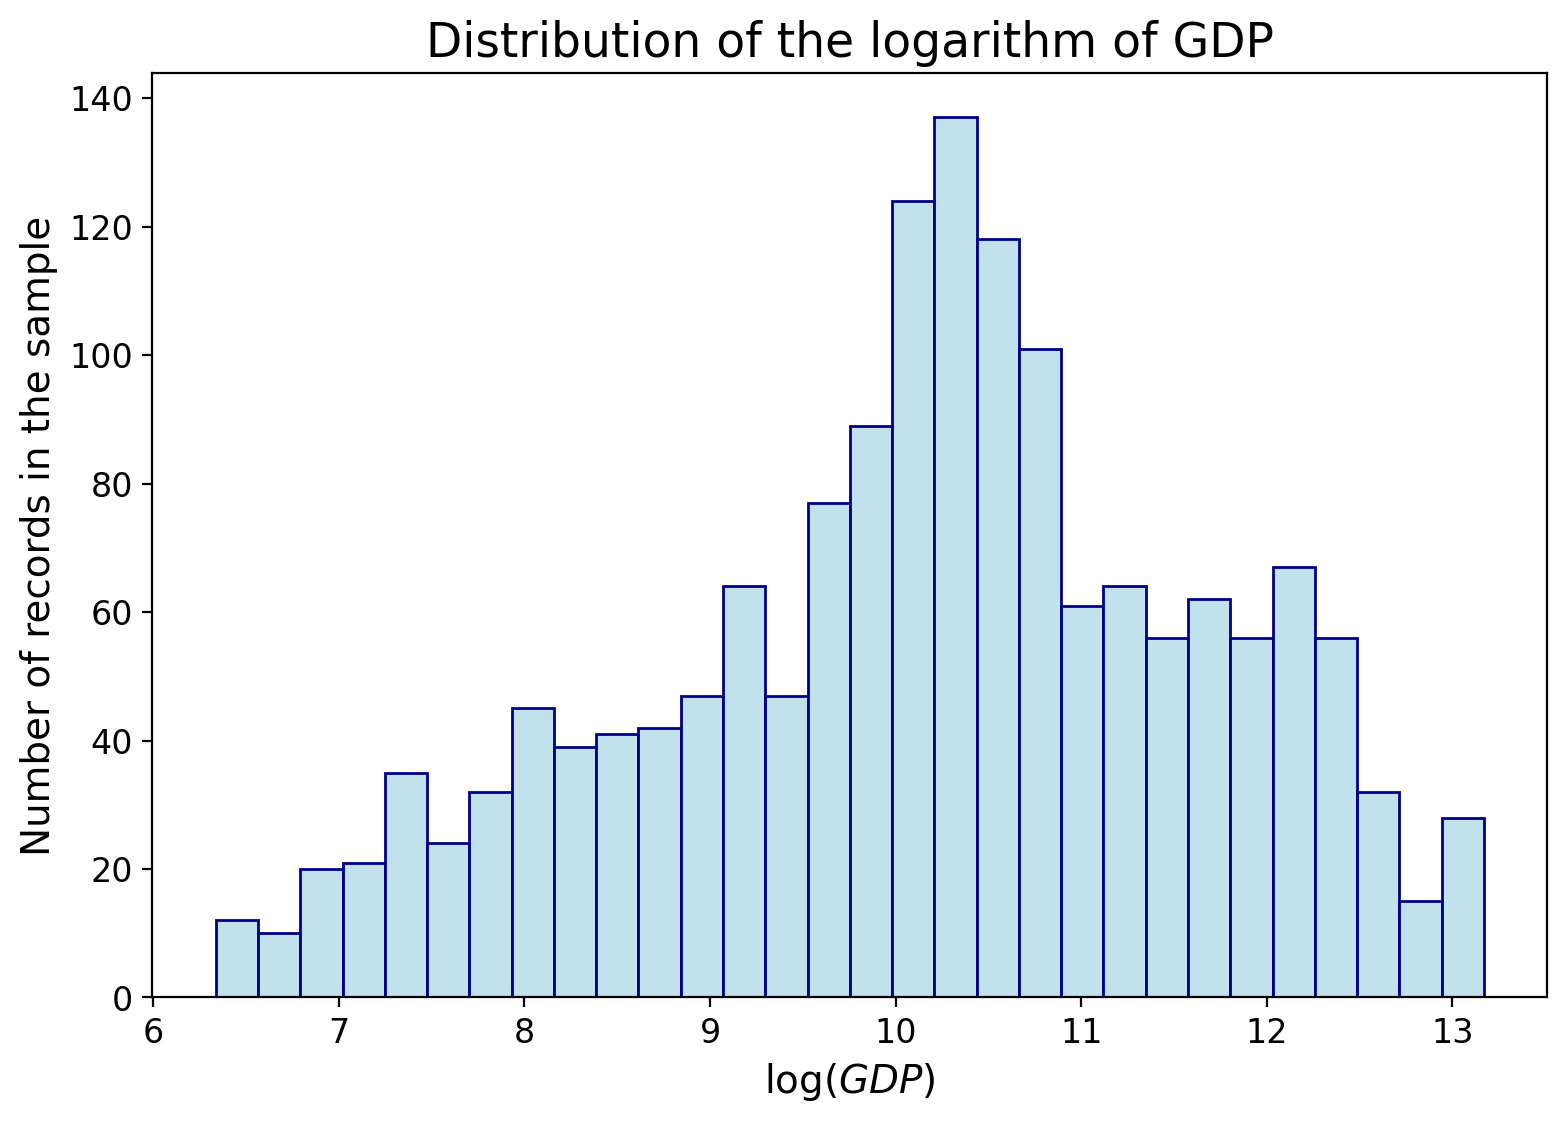

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Distribution of the logarithm of GDP', fontsize=17)
plt.xlabel('$\log(GDP)$', fontsize=14)
plt.ylabel('Number of records in the sample', fontsize=14)
sns.histplot(df['gdp'],
             bins=30,
             ax=ax, 
             color='lightblue',
             edgecolor='darkblue');

In [14]:
df['gdp'].describe()

count    1622.000000
mean       10.164133
std         1.507683
min         6.336454
25%         9.162179
50%        10.269161
75%        11.225090
max        13.170131
Name: gdp, dtype: float64

In [15]:
data_test = df.pivot(index='year', columns='country', values='gdp').reset_index()
data_test.year

0     1991
1     1992
2     1993
3     1994
4     1995
5     1996
6     1997
7     1998
8     1999
9     2000
10    2001
11    2002
12    2003
13    2004
14    2005
15    2006
16    2007
17    2008
18    2009
19    2010
20    2011
21    2012
22    2013
23    2014
24    2015
25    2016
26    2017
27    2018
28    2019
29    2020
Name: year, dtype: int64

In [16]:
data_test.columns[1:]

Index(['Algeria', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Malta', 'Mexico', 'Mongolia', 'Morocco', 'Netherlands',
       'Pakistan', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Türkiye', 'United Arab Emirates', 'United Kingdom'],
      dtype='object', name='country')

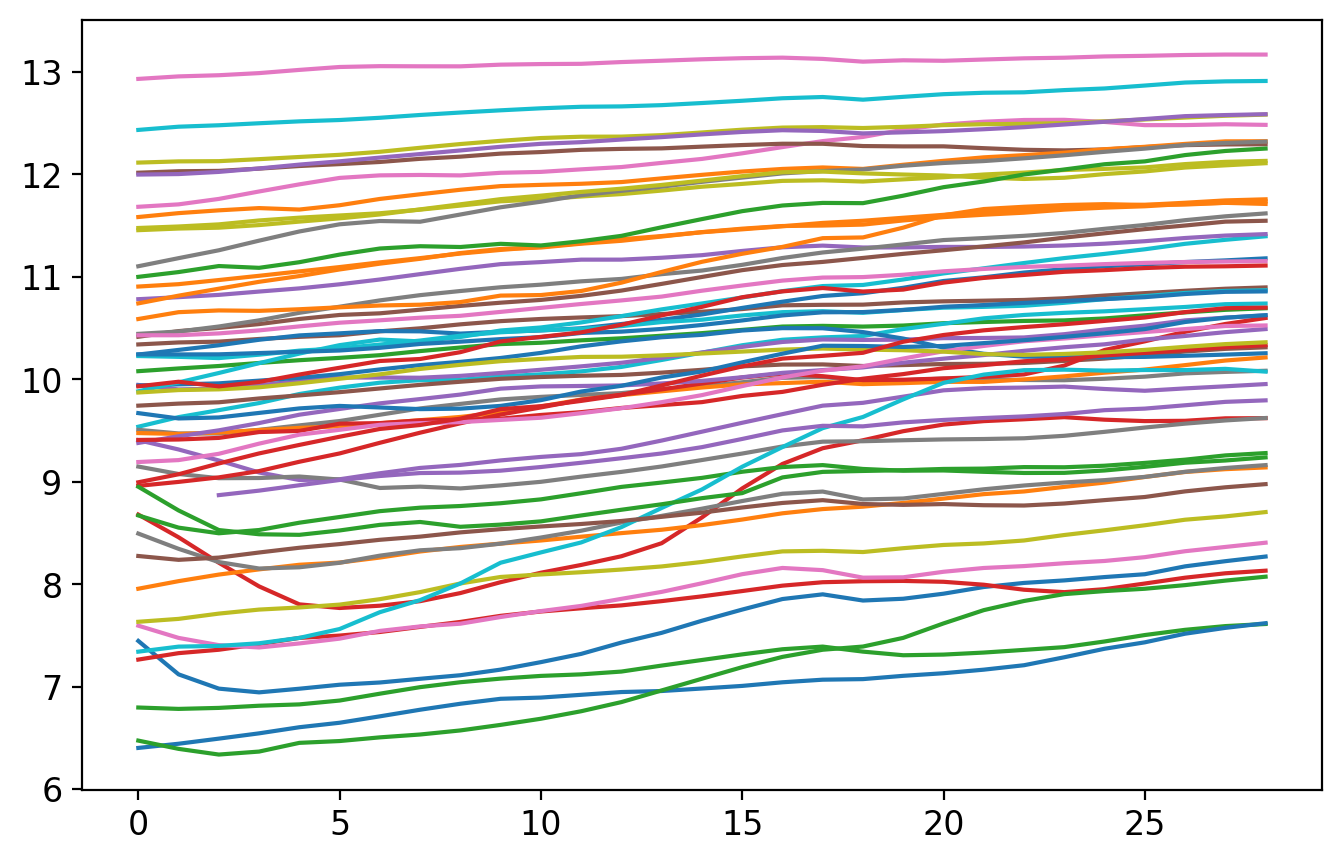

In [17]:
for country in data_test.columns[2:]:
    plt.plot(list(range(30)), data_test[country].values)

In [18]:
ctries = [c for c in data_test.columns if c!= 'year']
data_test['Other Countries'] = data_test[[c for c in ctries if c != treated_country]].mean(axis=1)

In [19]:
def plot_lines(df, line1, line2, year, hline=True, how_labels=7):
    sns.lineplot(x=df['year'], y=df[line1].values, label=line1)
    sns.lineplot(x=df['year'], y=df[line2].values, label=line2)
    plt.axvline(x=year, ls=":", color='#000000', label='Orban in power', zorder=1)
    plt.legend(shadow=True)  # title_fontsize=13, fontsize=12, ncol=2, loc='best'
    plt.xlabel('', fontsize=15)
    plt.ylabel('$\log$(GDP)', fontsize=14)
    label = np.linspace(0, 119, how_labels, dtype=int)
    # plt.title("log(GDP PPP) per quarter")
    #plt.xticks(label,
          # labels=le.inverse_transform(label),
          # fontsize=13,
          # rotation=30);

In [20]:
label = np.linspace(0, 29, 5, dtype=int)
label

array([ 0,  7, 14, 21, 29])

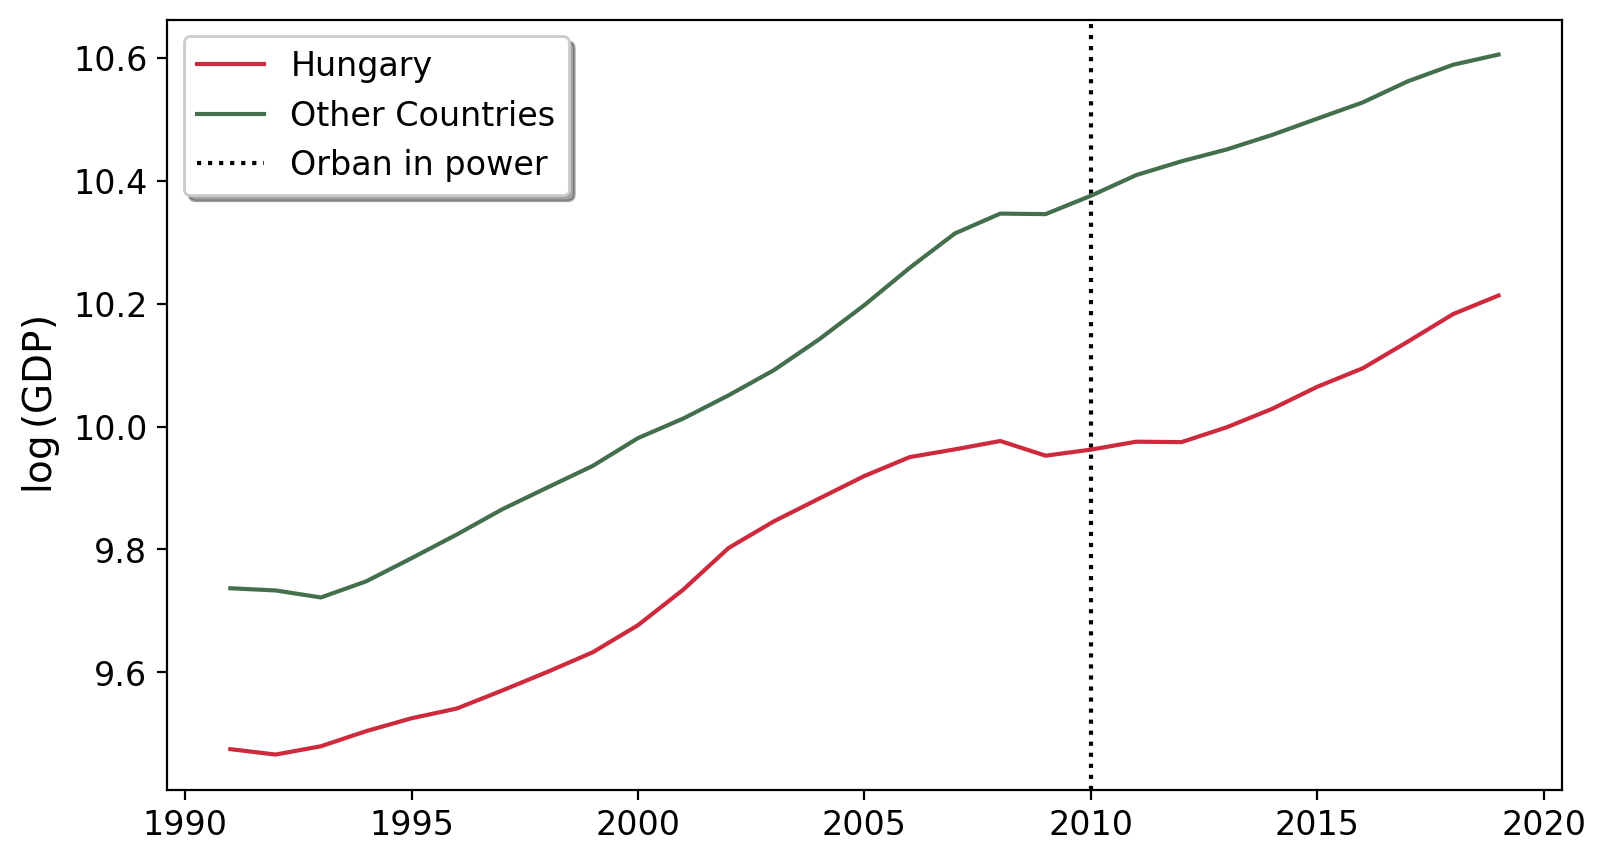

In [21]:
sns.set_palette(sns.color_palette(['#CD2A3E', '#436F4D', '#000000']))
plt.figure(figsize=(9, 5))
plot_lines(data_test, treated_country, 'Other Countries', treatment_year)

In [22]:
def synth_predict(df, model, city, year):
    other_cities = [c for c in ctries if c not in ['PERIOD', city]]
    y = df.loc[df['year'] <= year, city]
    X = df.loc[df['year'] <= year, other_cities]
    df[f'Synthetic {city}'] = model.fit(X, y).predict(df[other_cities])
    return model

In [23]:
from sklearn.linear_model import LinearRegression

data_test = data_test.dropna()
coef = synth_predict(data_test, LinearRegression(fit_intercept=True), treated_country, treatment_year).coef_

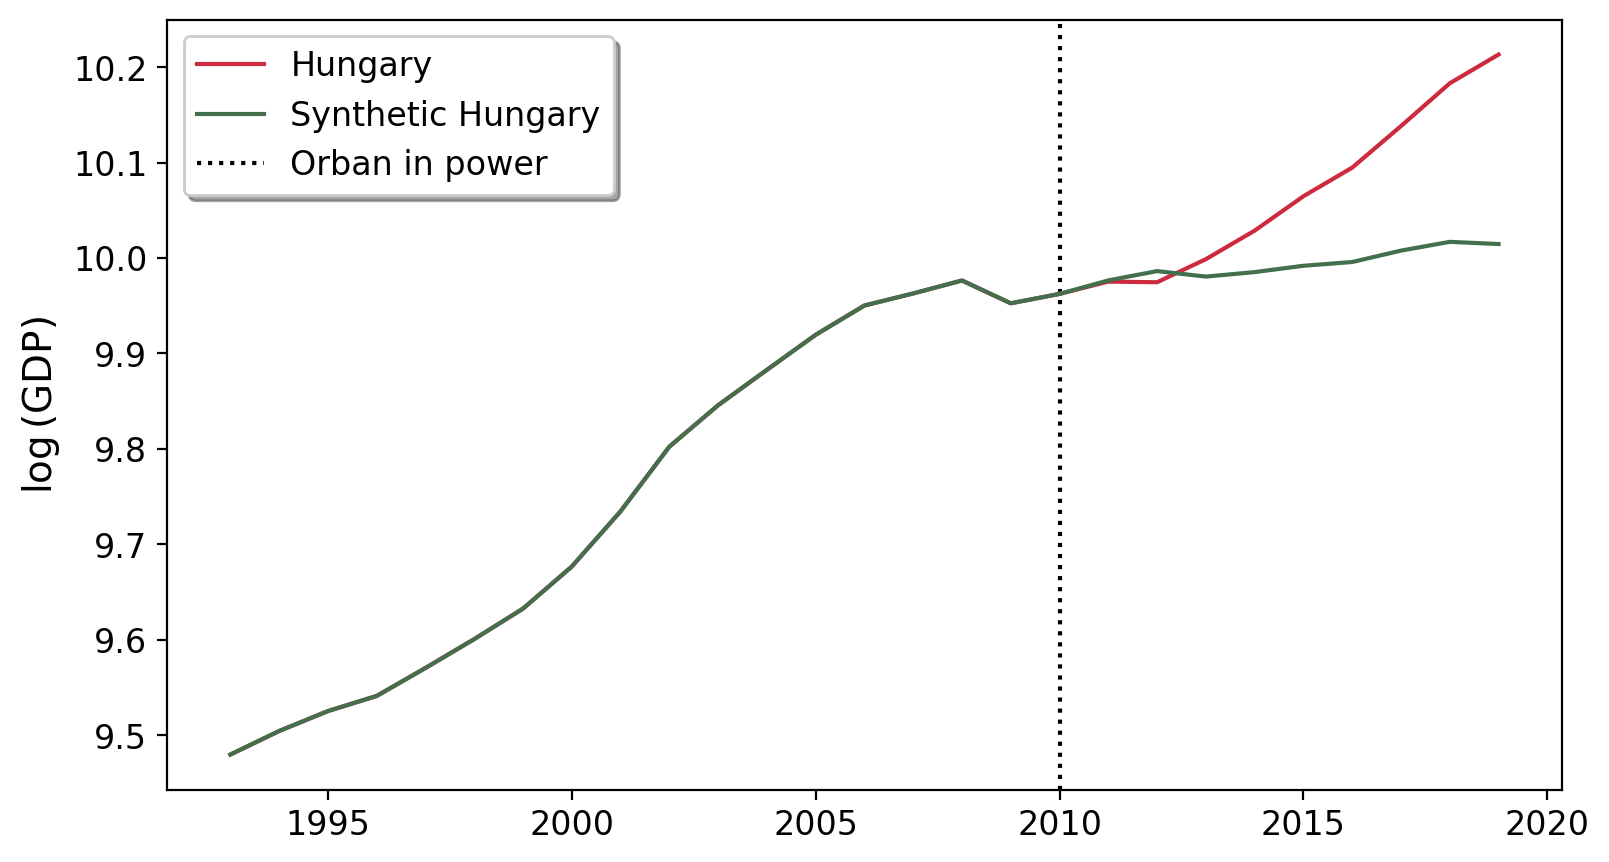

In [24]:
plt.figure(figsize=(9, 5))
plot_lines(data_test, treated_country, f'Synthetic {treated_country}', treatment_year)

In [25]:
from toolz import partial
from scipy.optimize import fmin_slsqp

class SyntheticControl():

    # Loss function
    def loss(self, W, X, y) -> float:
        return np.sqrt(np.mean((y - X.dot(W))**2))

    # Fit model
    def fit(self, X, y):
        w_start = [1/X.shape[1]]*X.shape[1]
        self.coef_ = fmin_slsqp(partial(self.loss, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,
                         bounds=[(0.0, 1.0)]*len(w_start),
                         disp=False)
        self.mse = self.loss(W=self.coef_, X=X, y=y)
        return self

    # Predict
    def predict(self, X):
        return X.dot(self.coef_)

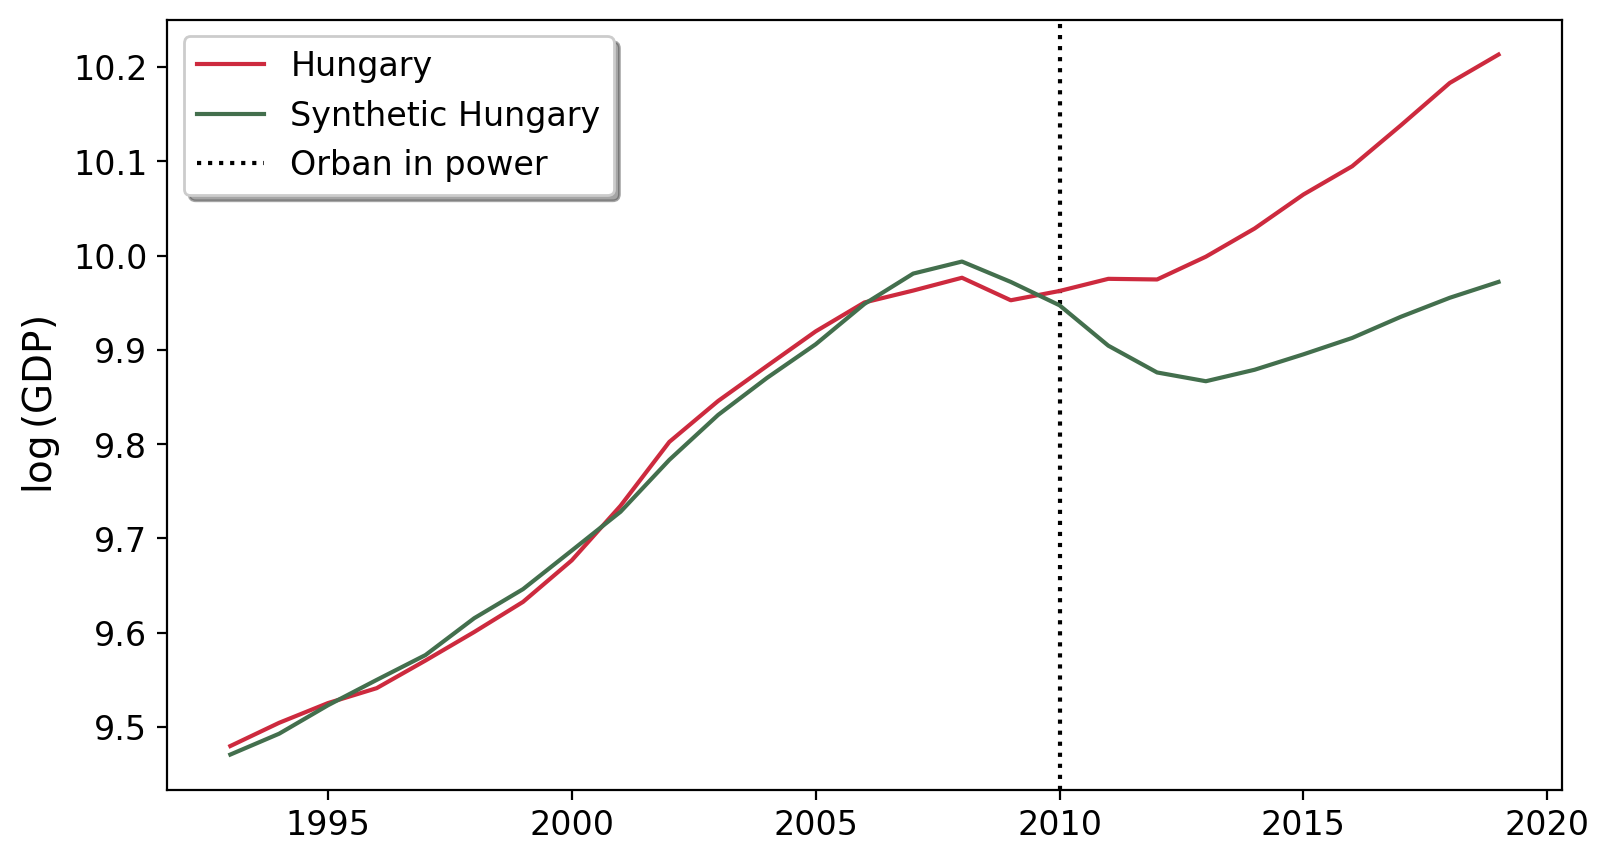

In [26]:
df_states = pd.DataFrame({'country': [c for c in ctries if c!=treated_country], 'ols_coef': coef})
df_states['coef_synth'] = synth_predict(data_test, SyntheticControl(), treated_country, treatment_year).coef_

plt.figure(figsize=(9, 5))
plot_lines(data_test, treated_country, f'Synthetic {treated_country}', treatment_year)

In [27]:
def my_plot_difference(df, city, year, vline=True, hline=True, how_labels=7, **kwargs):
    sns.lineplot(x=df['year'], y=df[f'Synthetic {city}'] - df[city], label='The difference between Hungary and Synthetic Hungary', color='blue', **kwargs)
    if vline: 
        plt.axvline(x=year, ls=":", color='C2', label='Orban in power', lw=3, zorder=100)
        plt.legend(shadow=True)
    if hline: sns.lineplot(x=df['year'], y=0, lw=3, color='k', zorder=1)
    label = np.linspace(0, 32, how_labels, dtype=int)
    plt.xlabel('', fontsize=15)
    plt.ylabel('$y_{synt} - y_{real}$', fontsize=14)
   # plt.xticks(label,
       #    labels=le.inverse_transform(label),
       #    fontsize=13,
       #    rotation=30);
    # plt.title("Estimated effect of self-driving cars");

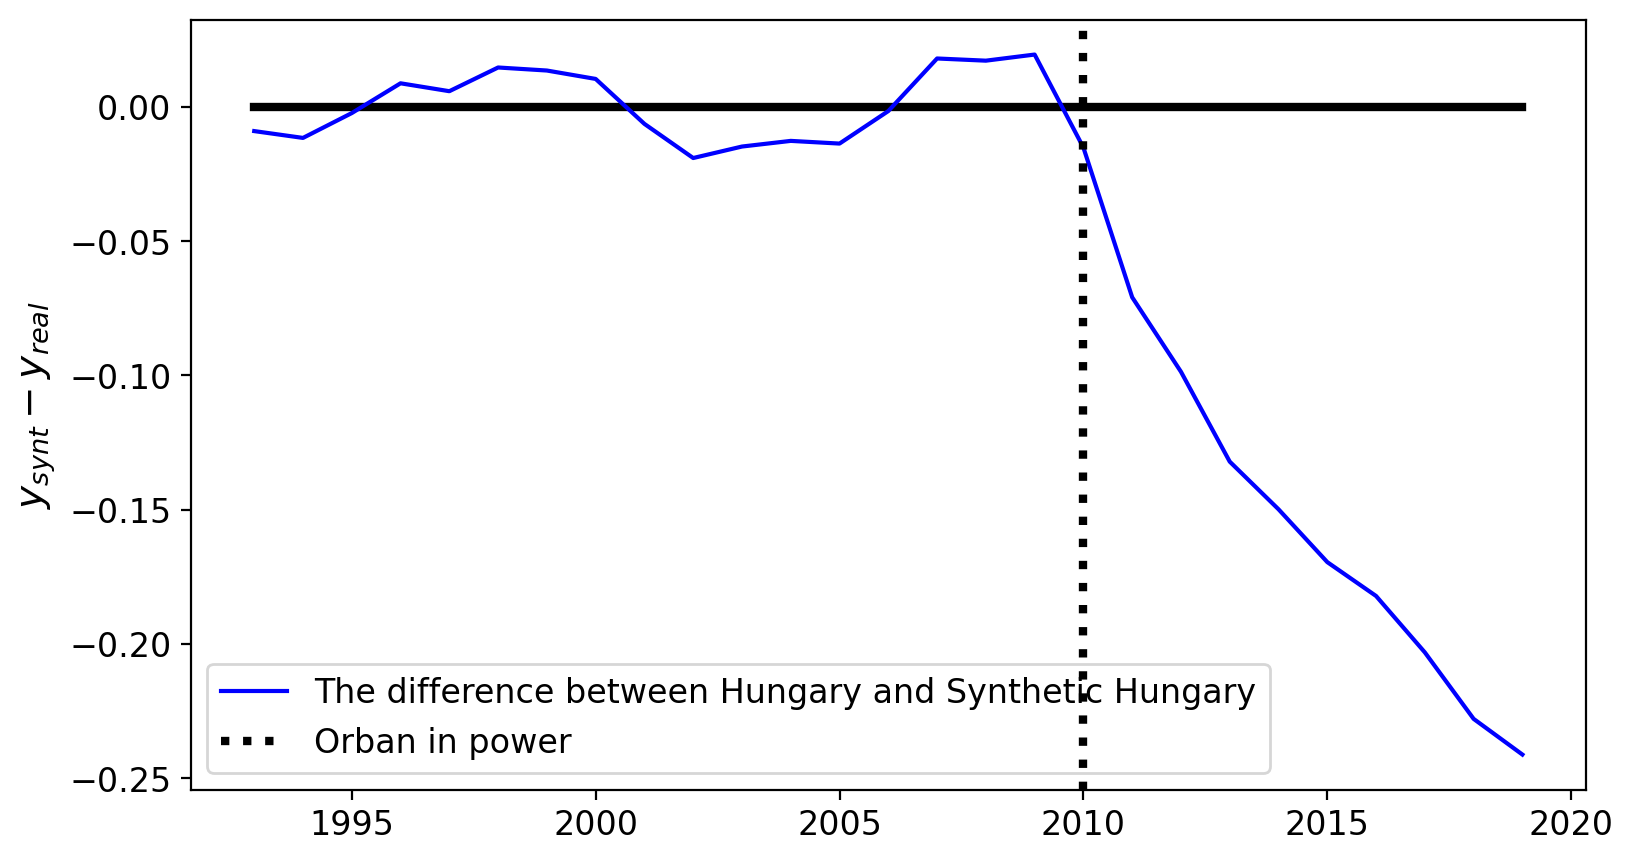

In [28]:
plt.figure(figsize=(9, 5))
my_plot_difference(data_test, treated_country, treatment_year)

In [29]:
vis_data = df_states[df_states['coef_synth'] > 0].sort_values('coef_synth', ascending=False)
vis_data = vis_data.iloc[:5]

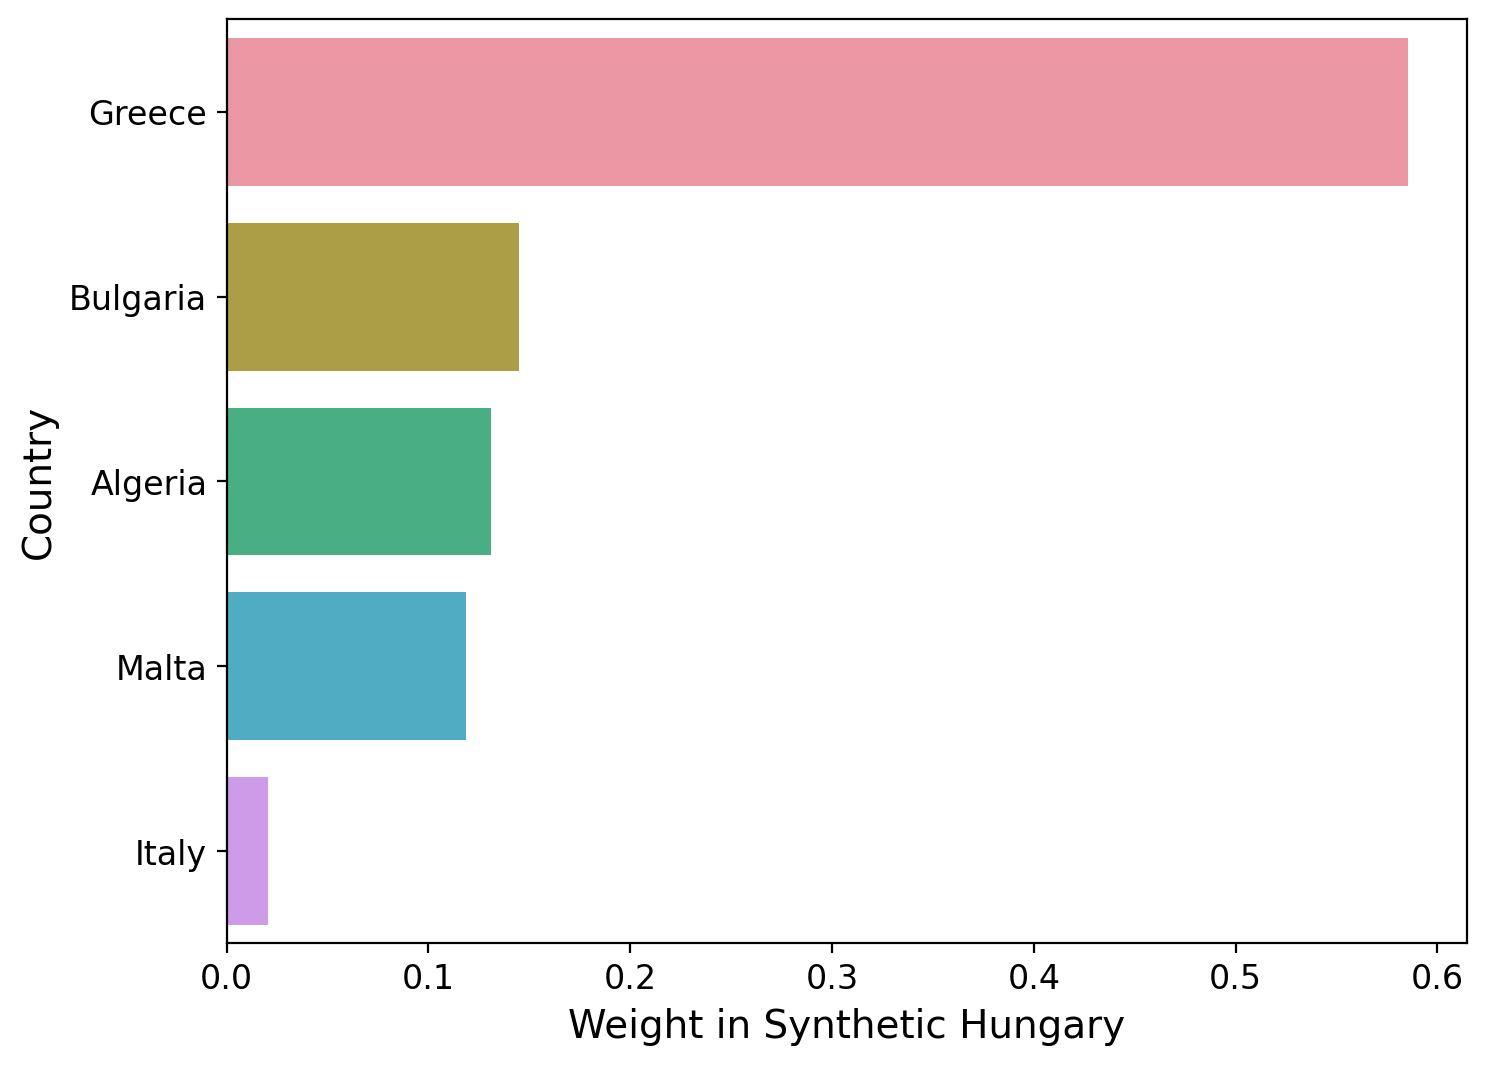

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(data=vis_data, x='coef_synth', y='country')
plt.xlabel('Weight in Synthetic Hungary', fontsize=14)
plt.ylabel('Country', fontsize=14);

In [31]:
vis_data.head()

,country,ols_coef,coef_synth
21,Greece,0.223575,0.585207
8,Bulgaria,0.047940,0.144691
0,Algeria,0.117744,0.130845
30,Malta,-0.079991,0.118549
25,Italy,0.136092,0.020707


In [32]:
def plot_difference(df, city, year, vline=True, hline=True, how_labels=7, **kwargs):
    sns.lineplot(x=df['year'], y=df[f'Synthetic {city}'] - df[city], **kwargs) # label='The difference between GBR and Synthetic GBR'
    if vline: 
        plt.axvline(x=year, ls=":", color='C2', label='Orban in power', lw=3, zorder=100)
        plt.legend(shadow=True)
    if hline: sns.lineplot(x=df['year'], y=0, lw=3, color='k', zorder=1)
    label = np.linspace(0, 119, how_labels, dtype=int)
    plt.xlabel('', fontsize=15)
    plt.ylabel('$y_{synt} - y_{real}$', fontsize=14)
    #plt.xticks(label,
     #      labels=le.inverse_transform(label),
     #      fontsize=13,
     #      rotation=30);
    # plt.title("Estimated effect of self-driving cars");

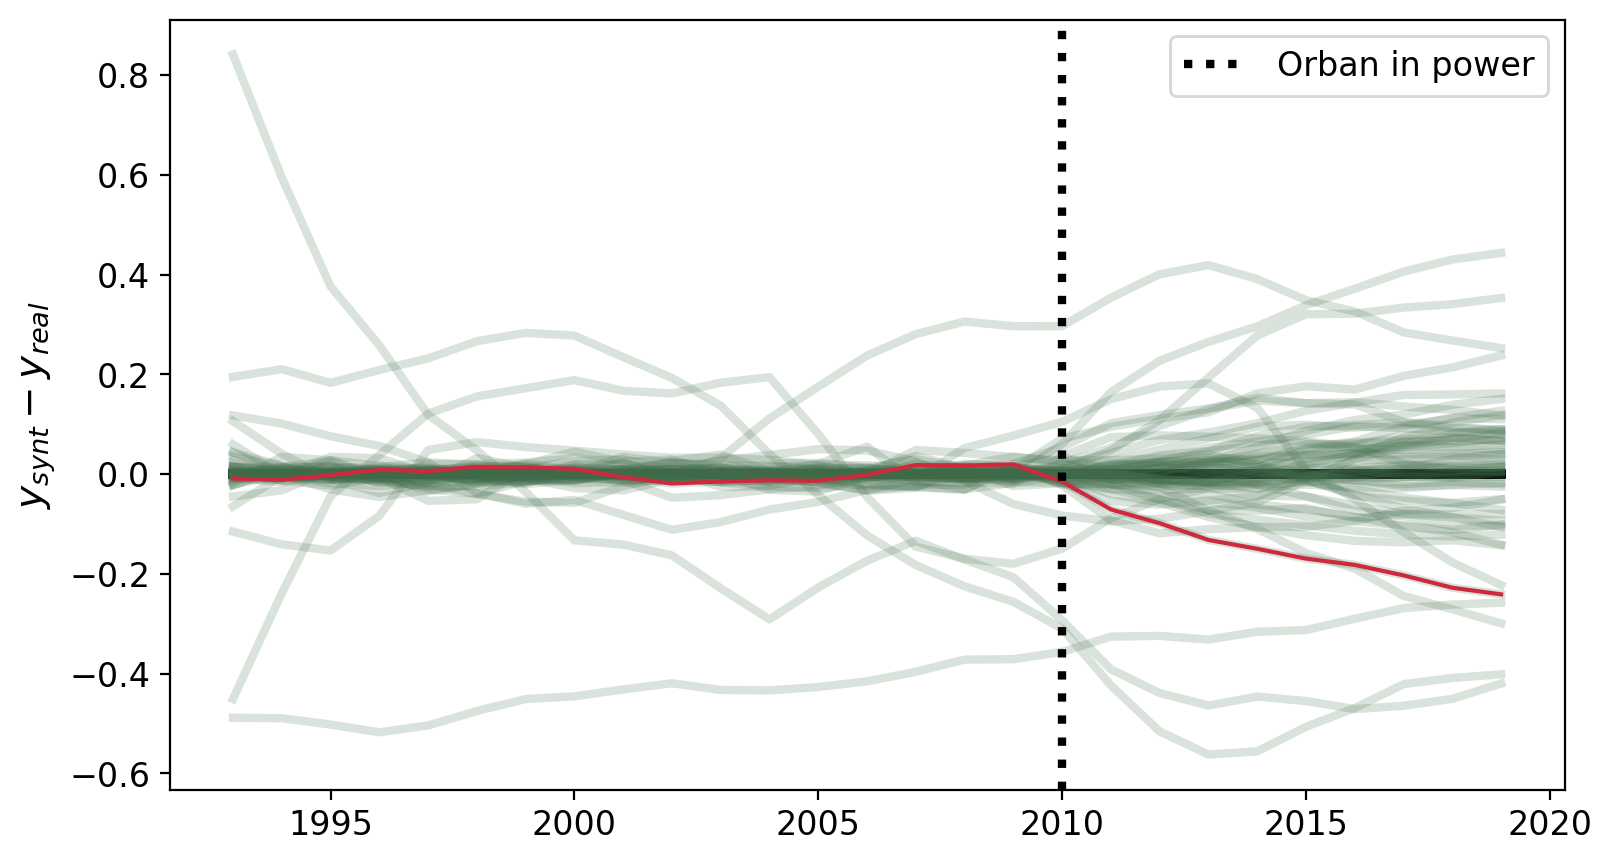

In [33]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(9, 5))
for cntr in ctries:
    synth_predict(data_test, SyntheticControl(), cntr, treatment_year)
    plot_difference(data_test, cntr, treatment_year, vline=False, alpha=0.2, color='C1', lw=3)
plot_difference(data_test, treated_country, treatment_year);

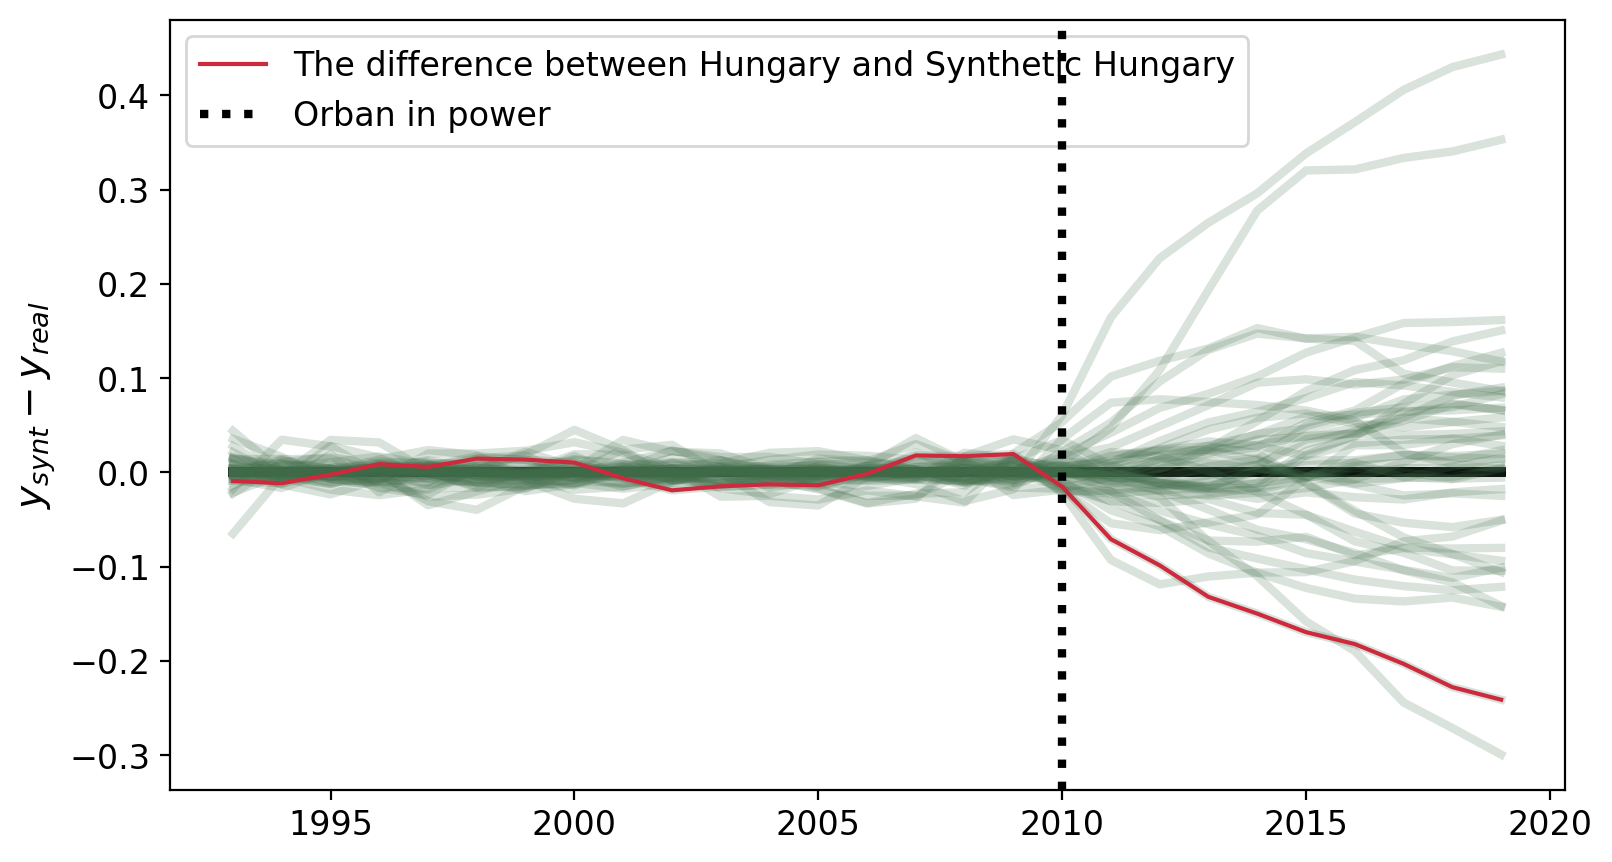

In [34]:
# Reference mse
mse_treated = synth_predict(data_test, SyntheticControl(), treated_country, treatment_year).mse

# Other mse
fig, ax = plt.subplots(figsize=(9, 5))
for cntr in ctries:
    mse = synth_predict(data_test, SyntheticControl(), cntr, treatment_year).mse
    if mse < 2 * mse_treated:
        plot_difference(data_test, cntr, treatment_year, vline=False, alpha=0.2, color='C1', lw=3)
plot_difference(data_test, treated_country, treatment_year, label='The difference between Hungary and Synthetic Hungary');

In [35]:
lambdas = {}
for cntr in ctries:
    mse_pre = synth_predict(data_test, SyntheticControl(), cntr, treatment_year).mse
    mse_tot = np.mean((data_test[f'Synthetic {cntr}'] - data_test[cntr])**2)
    lambdas[cntr] = (mse_tot - mse_pre) / mse_pre
    
print(f"p-value: {np.mean(np.fromiter(lambdas.values(), dtype='float') > lambdas[treated_country]):.4}")

p-value: 0.03571


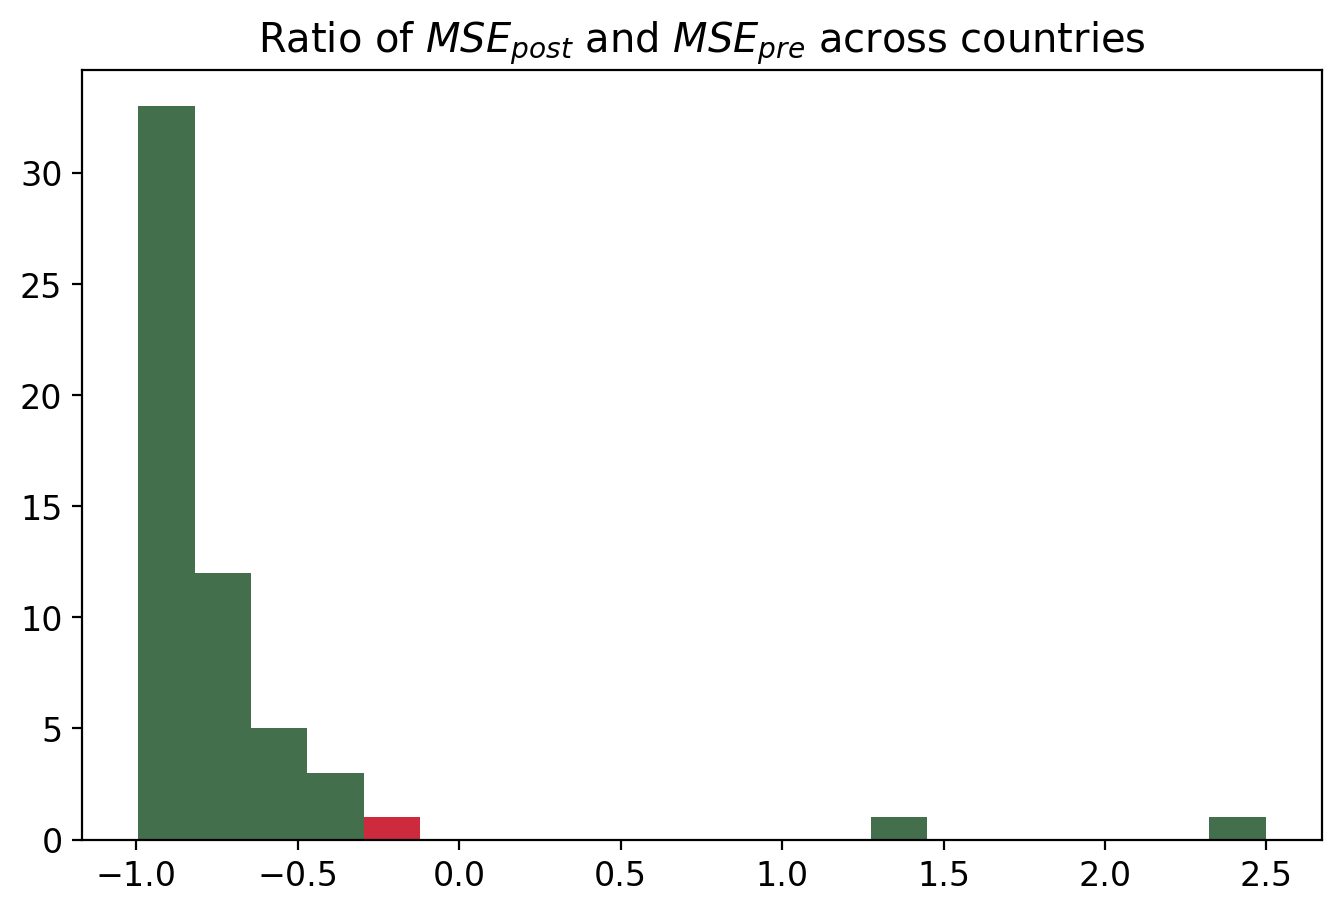

In [36]:
fig, ax = plt.subplots()
_, bins, _ = plt.hist(lambdas.values(), bins=20, color="C1");
plt.hist([lambdas[treated_country]], bins=bins)
plt.title('Ratio of $MSE_{post}$ and $MSE_{pre}$ across countries');